In [243]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import json
sns.set()

In [69]:
basic_info = []

with open('./correct.txt') as file:
    for line in file:
        data = json.loads(line)
        
        keys = ['year', 'n_citation']
        data_final = dict((k, data[k]) for k in keys if k in data)
        
        if data.get('authors'):
            data_final['authors'] = data['authors'][0].get('name')
        else:
            data_final['authors'] = None
        
        
        basic_info.append(data_final)

In [70]:
basic_info_df = pd.DataFrame.from_dict(basic_info)

In [79]:
basic_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353642 entries, 0 to 5354307
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   year        int16 
 1   n_citation  int16 
 2   authors     string
dtypes: int16(2), string(1)
memory usage: 102.1 MB


In [73]:
basic_info_df['year'] = basic_info_df['year'].fillna(0)
basic_info_df['n_citation'] = basic_info_df['n_citation'].fillna(0)

In [76]:
basic_info_df['year'] = basic_info_df['year'].astype('int16')
basic_info_df['n_citation'] = basic_info_df['n_citation'].astype('int16')
basic_info_df['authors'] = basic_info_df['authors'].astype("string")

In [78]:
basic_info_df = basic_info_df[(basic_info_df['year'] > 1900) & (basic_info_df['year'] < 2022)]

In [122]:
basic_info_df = basic_info_df[(basic_info_df['n_citation'] >= 0) & (basic_info_df['n_citation'] < 10**5)]

In [125]:
df = basic_info_df.groupby(['year']).mean()

In [126]:
df

n_citation
year            
1901    3.000000
1902    0.000000
1903    1.800000
1904    0.000000
1905    2.000000
...          ...
2017    9.024789
2018    5.249079
2019    1.997986
2020    0.719195
2021    0.092753

[121 rows x 1 columns]

Text(0.5, 1.0, 'Dependence of citation on the year')

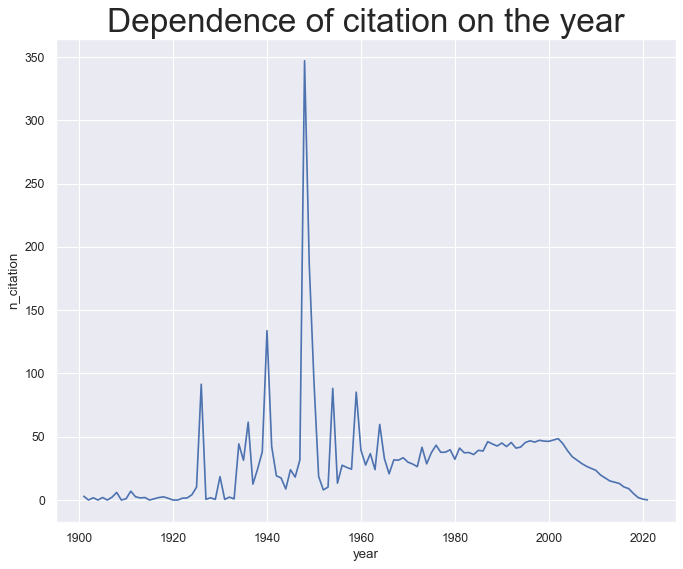

In [267]:
plt.figure(figsize=(10, 8), dpi=80)
axes = sns.lineplot(data=df, x=df.index, y='n_citation')
axes.axes.set_title('Dependence of citation on the year', fontsize=30)

In [135]:
with open('./author_id_hindex.json') as f:
    data = json.loads(f.read())


In [139]:
authors_df = pd.DataFrame()

In [140]:
authors_df['id'] = pd.Series(data.keys())

In [143]:
authors_df['name'] = [data[key].get('name') for key in data.keys()]

In [145]:
authors_df['h-index'] = [data[key].get('h-index') for key in data.keys()]

In [156]:
authors_df.shape

(4362827, 3)

In [151]:
authors_df['id'] = authors_df['id'].astype('string')
authors_df['name'] = authors_df['name'].astype('string')
authors_df['h-index'] = authors_df['h-index'].astype('int16')

In [185]:
authors_df.nunique()

id         4362827
name       2930858
h-index        143
dtype: int64

In [189]:
authors_df['h-index'].unique()

array([  3,   0,   4,   6,  36,   1,  12,  16,   2,  24,  15,  21,  27,
         5,   8,  33,   7,  11,  19,  10,  49,  55,  35,  47,  28,  70,
        14,  42,  17,  26,  34,  22,  37,  41,  23,  13,  56,  31,  58,
        29,  48,  20,  43,  18,  25,   9,  65,  71,  69,  39,  50,  90,
        44,  52,  46,  93,  57, 104,  60,  63, 117,  38,  32,  62,  30,
        79,  92,  54,  95, 129,  40,  77,  68,  53,  72,  87,  85, 103,
        74,  51,  98,  80,  45, 135, 130,  78,  66, 115,  96,  64,  75,
        76, 110,  91,  83,  73, 119,  59,  84, 111, 100, 114,  61, 144,
        86,  67, 128, 109,  81,  94, 118, 122, 176, 106, 107,  82, 165,
        89, 102,  99, 126, 124,  88, 105, 167, 156, 108, 161, 116,  97,
       123, 134, 139, 154, 112, 120, 142, 121, 149, 153, 133, 146, 101],
      dtype=int16)

In [217]:
authors_df_count = authors_df['h-index'].value_counts()

In [218]:
authors_df_count

1      2222293
0      1307051
2       334516
3       152272
4        90989
        ...   
117          1
165          1
144          1
176          1
101          1
Name: h-index, Length: 143, dtype: int64

In [210]:
h_index_sorted = authors_df.sort_values(by='h-index', ascending=True)

In [212]:
h_index_sorted

id               name  h-index
4362826                 MihaiUlea         Mihai Ulea        0
3492863                  DaweiMai          Dawei Mai        0
947165   540832f0dabfae8faa630b20        Adam Harris        0
947164   53f45014dabfaec09f1ee324    Gustavo Gambach        0
947163   544078a4dabfae805a6c22f8          Liang Wei        0
...                           ...                ...      ...
15996    53f48cfedabfaea7cd1d0d8e  Michael I. Jordan      156
18406    53f46ca8dabfaec09f2584aa       A. Zisserman      161
11079    53f48046dabfae963d259326       Anil K. Jain      165
15605    53f4ba75dabfaed83977b7db      Yoshua Bengio      167
8974     53f42f36dabfaedce54dcd0c         Jiawei Han      176

[4362827 rows x 3 columns]

In [247]:
index = authors_df_count[0:5].sum()

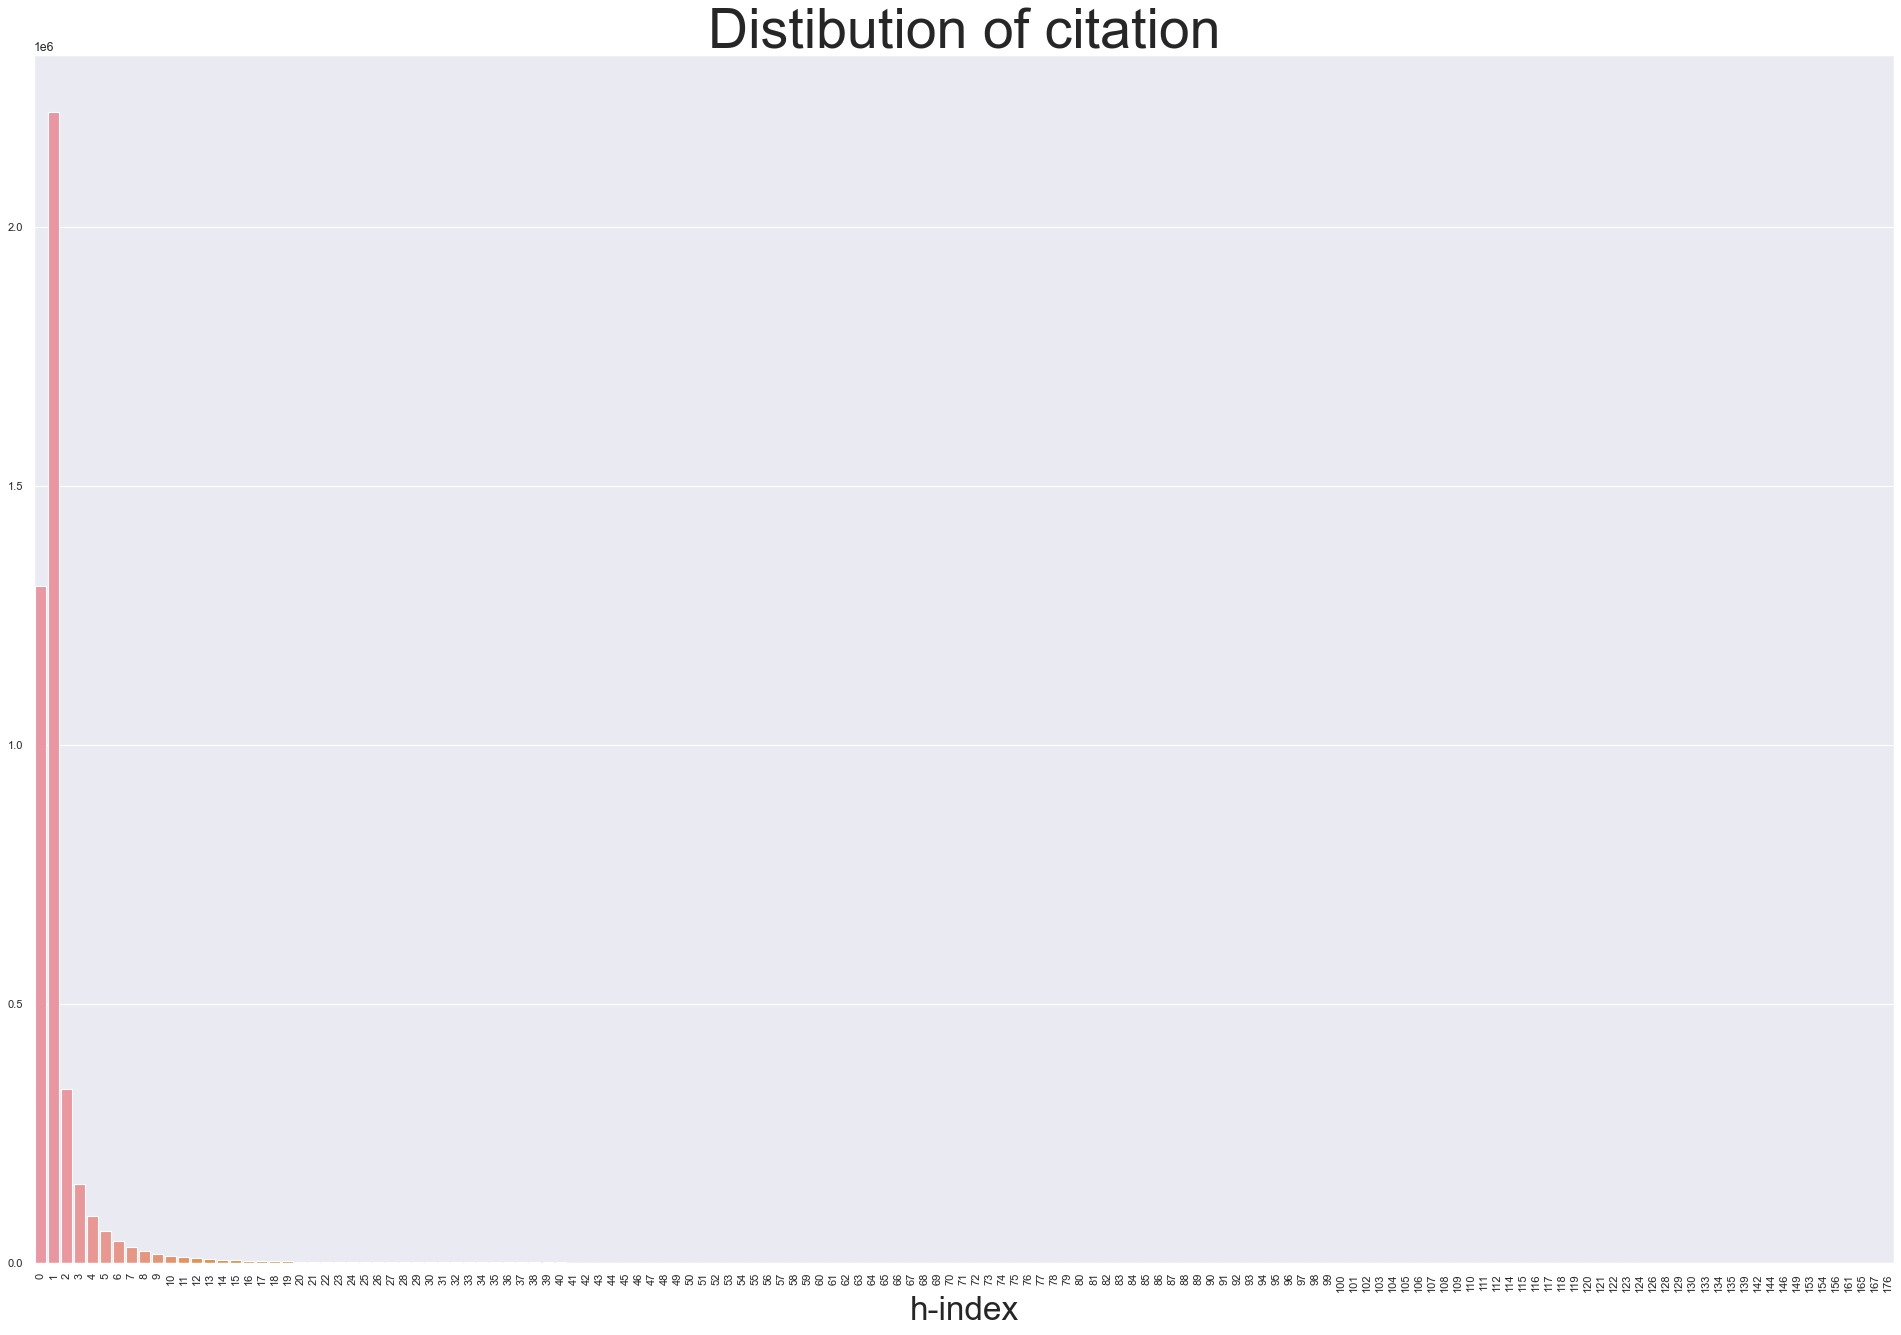

In [259]:
plt.figure(figsize=(30, 20), dpi=80)
plt.xticks(rotation=90)

axes = sns.countplot(x='h-index', data=h_index_sorted)
axes.axes.set_title('Distibution of citation', fontsize=50)
axes.set_ylabel("",fontsize=20)
axes.set_xlabel("h-index",fontsize=30)
axes.tick_params(labelsize=10)

Text(0.5, 1.0, 'Distibution of citation from 0 to 15')

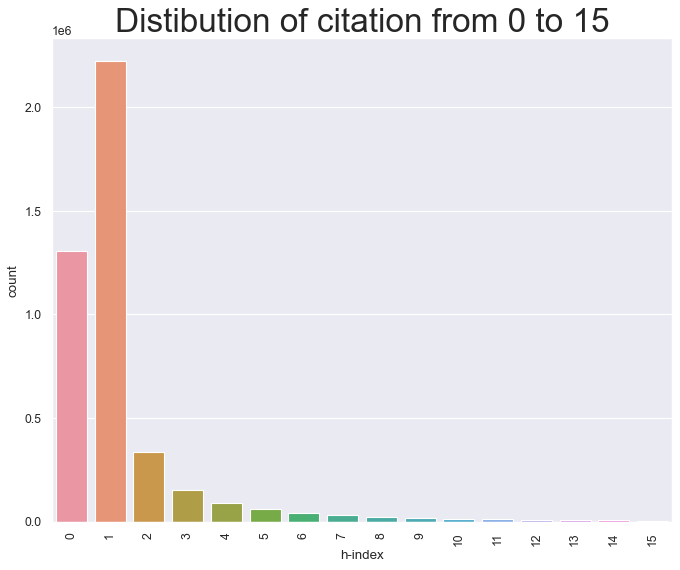

In [264]:
plt.figure(figsize=(10, 8), dpi=80)
plt.xticks(rotation=90)
index = authors_df_count[0:16].sum()
axes = sns.countplot(x='h-index', data=h_index_sorted[:index])
axes.axes.set_title('Distibution of citation from 0 to 15', fontsize=30)

Text(0.5, 1.0, 'Distibution of citation from 15 to maximum')

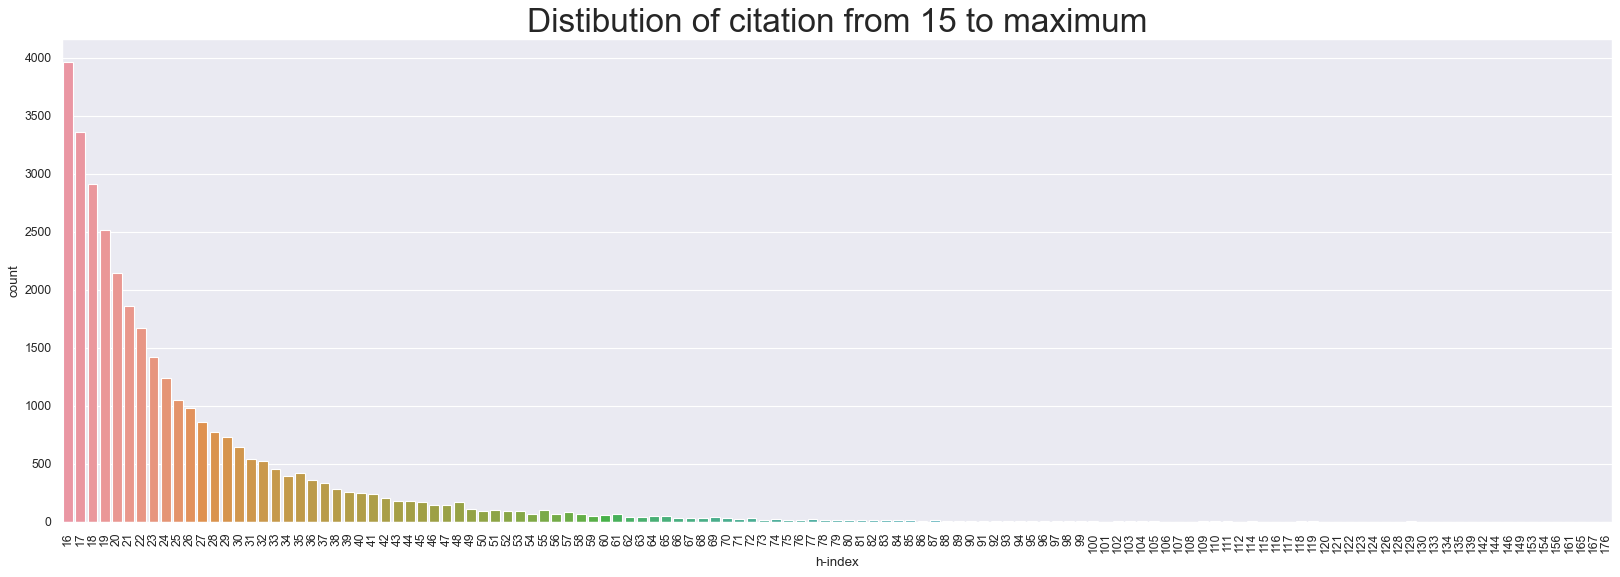

In [266]:
plt.figure(figsize=(25, 8), dpi=80)
plt.xticks(rotation=90)
axes = sns.countplot(x='h-index', data=h_index_sorted[index:])
axes.axes.set_title('Distibution of citation from 15 to maximum', fontsize=30)

In [ ]:
sort_values(by='h-index', ascending=False)[:31]

In [170]:
top30 = authors_df.sort_values(by='h-index', ascending=False)[:31]

In [196]:
authors_df_count

1      2222293
0      1307051
2       334516
3       152272
4        90989
        ...   
117          1
165          1
144          1
176          1
101          1
Name: h-index, Length: 143, dtype: int64

Text(0.5, 1.0, 'Top 30 authors by h-index')

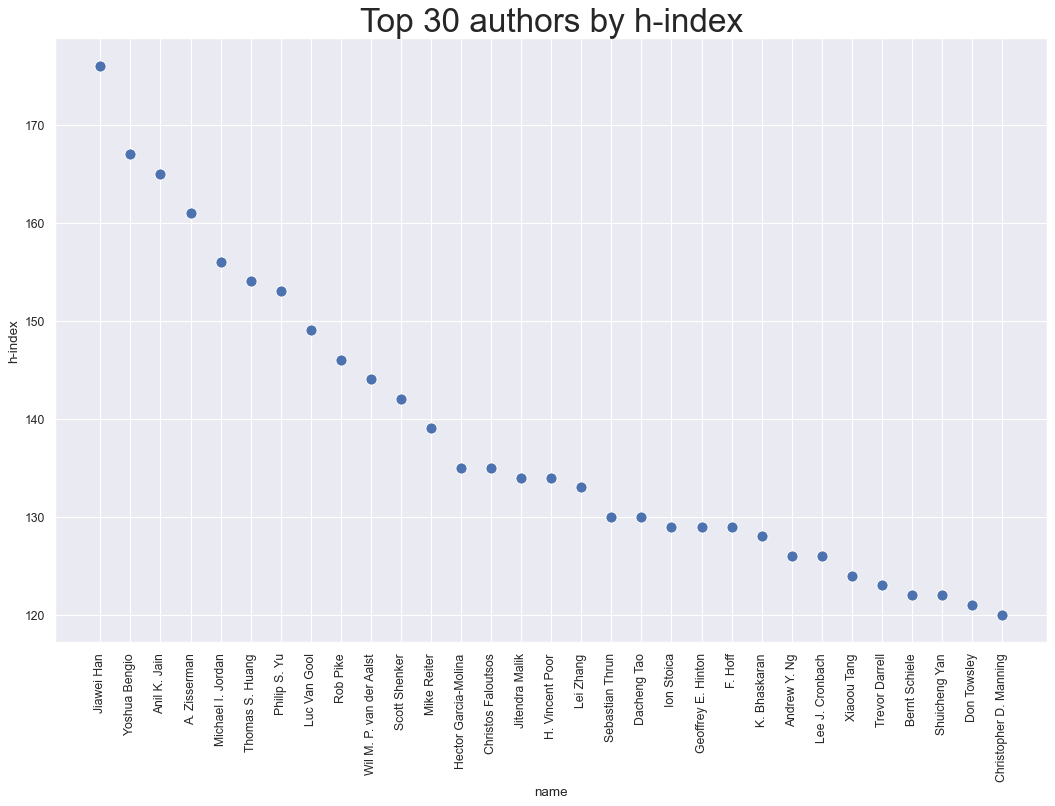

In [268]:
plt.figure(figsize=(16, 10), dpi=80)
plt.xticks(rotation=90)
axes = sns.scatterplot(x="name", y="h-index", data=top30, s=100)
axes.axes.set_title('Top 30 authors by h-index', fontsize=30)